# DeepBGC Example Result

In [38]:
import pandas as pd
from Bio import SeqIO
import os
from IPython.display import Image
import matplotlib.pyplot as plt

RESULT_PATH = './data/example'
RESULT_NAME = 'example'
%matplotlib inline

In [39]:
def print_text_file(path, limit=50):
    with open(path) as f:
        for i, line in enumerate(f):
            if i == limit:
                print('...showing first {} lines only...'.format(limit))
                break
            print(line, end='')

# README.txt

A text file providing descriptions of all result files and the DeepBGC command that was used

In [40]:
print_text_file(os.path.join(RESULT_PATH, 'README.txt'))

DeepBGC
/Users/prihodad/anaconda3/envs/bgc/bin/deepbgc pipeline --continue --output example --detector deepbgc --detector clusterfinder_geneborder --detector clusterfinder_retrained --detector clusterfinder_original data/ClusterFinder_Annotated_Contigs.full.gbk
LOG.txt	Log output of DeepBGC
example.bgc.gbk 	Sequences and features of all detected BGCs in GenBank format
example.bgc.tsv 	Table of detected BGCs and their properties
example.full.gbk 	Fully annotated input sequence with proteins, Pfam domains (PFAM_domain features) and BGCs (cluster features)
example.pfam.tsv 	Table of Pfam domains (pfam_id) from given sequence (sequence_id) in genomic order, with BGC detection scores
evaluation/example.bgc.png 	Detected BGCs plotted by their nucleotide coordinates
evaluation/example.pr.png 	Precision-Recall curve based on predicted per-Pfam BGC scores
evaluation/example.roc.png 	ROC curve based on predicted per-Pfam BGC scores
evaluation/example.score.png 	BGC detection scores of each Pfam 

# LOG.txt

A text file with DeepBGC log output

In [41]:
print_text_file(os.path.join(RESULT_PATH, 'LOG.txt'))

Loading model from: ../../../data/releases/0.1.0/detector/deepbgc.pkl
Loading model from: ../../../data/releases/0.1.0/detector/clusterfinder_geneborder.pkl
Loading model from: ../../../data/releases/0.1.0/detector/clusterfinder_retrained.pkl
Loading model from: ../../../data/releases/0.1.0/detector/clusterfinder_original.pkl
Loading model from: ../../../data/releases/0.1.0/classifier/product_class.pkl
Loading model from: ../../../data/releases/0.1.0/classifier/product_activity.pkl
Processing record #1: CM000950.1
Preparing record CM000950.1
Sequence already contains 6869 CDS features, skipping CDS detection
Sequence already contains 14262 Pfam features, skipping Pfam detection
Detecting BGCs using deepbgc model in CM000950.1
Detected 110 BGCs using deepbgc model in CM000950.1
Detecting BGCs using clusterfinder_geneborder model in CM000950.1
Detected 121 BGCs using clusterfinder_geneborder model in CM000950.1
Detecting BGCs using clusterfinder_retrained model in CM000950.1
Detected 247

# example.bgc.gbk

Sequences and features of all detected BGCs in GenBank format

In [42]:
print_text_file(os.path.join(RESULT_PATH, RESULT_NAME+'.bgc.gbk'), limit=70)

LOCUS       CM000950                5016 bp    DNA              UNK 01-JAN-1980
DEFINITION  .
ACCESSION   CM000950.1_13-5029.1
VERSION     CM000950.1_13-5029.1
KEYWORDS    .
SOURCE      Streptomyces pristinaespiralis ATCC 25486
  ORGANISM  Streptomyces pristinaespiralis ATCC 25486
            .
FEATURES             Location/Qualifiers
     cluster         1..5016
                     /deepbgc_score="0.60027"
                     /detector="deepbgc"
                     /detector_label="deepbgc"
                     /detector_version="0.1.0"
                     /detector_version_timestamp="1551305667.986168"
                     /product="deepbgc_putative"
                     /bgc_candidate_id="CM000950.1_13-5029.1"
                     /product_class_score="Alkaloid=0.03,NRP=0.05,Other=0.16,Pol
                     yketide=0.33,RiPP=0.13,Saccharide=0.06,Terpene=0.28"
                     /product_class=""
                     /product_activity_score="antibacterial=0.32,cytotoxic=0.45

In [43]:
bgc_records = SeqIO.parse(os.path.join(RESULT_PATH, RESULT_NAME+'.bgc.gbk'), 'genbank')

for i, bgc_record in enumerate(bgc_records):
    if i == 3:
        break
    print('='*80)
    print('BGC {}'.format(i+1))
    print(bgc_record)
    print()

BGC 1
ID: CM000950.1_13-5029.1
Name: CM000950
Number of features: 31
/molecule_type=DNA
/data_file_division=UNK
/date=01-JAN-1980
/accessions=['CM000950.1_13-5029.1']
/keywords=['']
/source=Streptomyces pristinaespiralis ATCC 25486
/organism=Streptomyces pristinaespiralis ATCC 25486
/taxonomy=[]
Seq('ATGTTCCAGAACGCCGCCCGTACGGCGATCGGCCTCGGCGCGGCCCGGCTGGTC...TGA', IUPACAmbiguousDNA())

BGC 2
ID: CM000950.1_13-5029.1
Name: CM000950
Number of features: 31
/molecule_type=DNA
/data_file_division=UNK
/date=01-JAN-1980
/accessions=['CM000950.1_13-5029.1']
/keywords=['']
/source=Streptomyces pristinaespiralis ATCC 25486
/organism=Streptomyces pristinaespiralis ATCC 25486
/taxonomy=[]
Seq('ATGTTCCAGAACGCCGCCCGTACGGCGATCGGCCTCGGCGCGGCCCGGCTGGTC...TGA', IUPACAmbiguousDNA())

BGC 3
ID: CM000950.1_9665-29014.1
Name: CM000950
Number of features: 73
/molecule_type=DNA
/data_file_division=UNK
/date=01-JAN-1980
/accessions=['CM000950.1_9665-29014.1']
/keywords=['']
/source=Streptomyces pristinaespiralis

# example.bgc.tsv

Table of detected BGCs and their properties

In [44]:
bgcs = pd.read_csv(os.path.join(RESULT_PATH, RESULT_NAME+'.bgc.tsv'), sep='\t')
bgcs.head()

sequence_id                 detector detector_version  \
0  CM000950.1                  deepbgc            0.1.0   
1  CM000950.1   clusterfinder_original            0.1.0   
2  CM000950.1                  deepbgc            0.1.0   
3  CM000950.1   clusterfinder_original            0.1.0   
4  CM000950.1  clusterfinder_retrained            0.1.0   

            detector_label          bgc_candidate_id  nucl_start  nucl_end  \
0                  deepbgc      CM000950.1_13-5029.1          13      5029   
1   clusterfinder_original      CM000950.1_13-5029.1          13      5029   
2                  deepbgc   CM000950.1_9665-29014.1        9665     29014   
3   clusterfinder_original  CM000950.1_16254-21404.1       16254     21404   
4  clusterfinder_retrained  CM000950.1_29462-32183.1       29462     32183   

   nucl_length  num_proteins  num_domains  ...  Polyketide  RiPP Saccharide  \
0         5016             6           17  ...        0.33  0.13       0.06   
1         5016             6           17  ...        0.33  0.13       0.06   
2        19349            21           28  ...        0.30  0.03       0.06   
3         5150             8            8  ...        0.40  0.15       0.07   
4         2721             2            7  ...        0.74  0.01       0.01   

   Terpene  clusterfinder_original_score  clusterfinder_retrained_score  \
0     0.28                           NaN                            NaN   
1     0.28                       0.94580                            NaN   
2     0.33                           NaN                            NaN   
3     0.32                       0.99217                            NaN   
4     0.23                           NaN                        0.74548   

   clusterfinder_geneborder_score  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

                                         protein_ids  \
0  EDY62461.1;EDY62462.1;EDY62463.1;EDY62464.1;ED...   
1  EDY62461.1;EDY62462.1;EDY62463.1;EDY62464.1;ED...   
2  EDY62472.1;EDY62474.1;EDY62475.2;EDY62476.2;ED...   
3  EDY62478.1;EDY62479.1;EDY62480.1;EDY62481.1;ED...   
4                              EDY62491.2;EDY62492.1   

                      bio_pfam_ids  \
0  PF01494;PF01266;PF08241;PF08242   
1  PF01494;PF01266;PF08241;PF08242   
2          PF00903;PF01266;PF00248   
3                          PF01266   
4          PF01370;PF08659;PF00106   

                                            pfam_ids  
0  PF13515;PF05175;PF13489;PF01728;PF13847;PF0589...  
1  PF13515;PF05175;PF13489;PF01728;PF13847;PF0589...  
2  PF13906;PF00324;PF13520;PF03845;PF00248;PF0424...  
3  PF03995;PF09350;PF14404;PF10604;PF16901;PF0126...  
4  PF06628;PF00199;PF13561;PF13460;PF00106;PF0137...  

[5 rows x 31 columns]

### Number of detected BGCs per detector

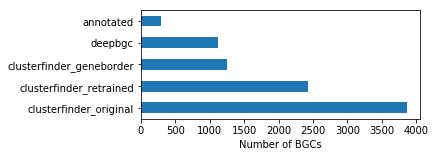

In [45]:
ax = bgcs['detector_label'].value_counts().plot.barh(figsize=(5, 2))
ax.set_xlabel('Number of BGCs');

### Average nucleotide length per detector

Average BGC nucleotide length:
detector_label
annotated                   21695.534014
clusterfinder_geneborder    15572.121019
clusterfinder_original       7853.014771
clusterfinder_retrained      8603.258969
deepbgc                     19747.977578
Name: nucl_length, dtype: float64


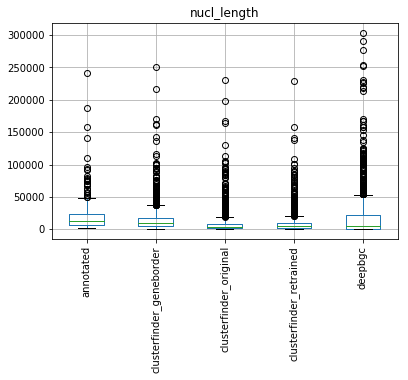

In [46]:
ax = bgcs.boxplot(column='nucl_length', by='detector_label')
plt.xticks(rotation=90)
ax.set_xlabel('')
ax.figure.suptitle('')
print('Average BGC nucleotide length:')
print(bgcs.groupby('detector_label')['nucl_length'].mean())

### Average number of proteins per detector

Average number of proteins in BGC:
detector_label
annotated                   12.829932
clusterfinder_geneborder    12.944268
clusterfinder_original       6.651464
clusterfinder_retrained      7.248660
deepbgc                     16.395516
Name: num_proteins, dtype: float64


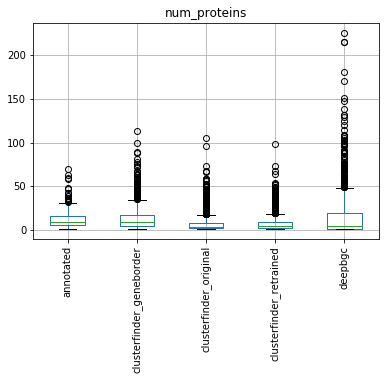

In [47]:
ax = bgcs.boxplot(column='num_proteins', by='detector_label')
plt.xticks(rotation=90)
ax.set_xlabel('')
ax.figure.suptitle('')
print('Average number of proteins in BGC:')
print(bgcs.groupby('detector_label')['num_proteins'].mean())

# example.full.gbk

Fully annotated input sequence with proteins, Pfam domains (PFAM_domain features) and BGCs (cluster features)

In [48]:
print_text_file(os.path.join(RESULT_PATH, RESULT_NAME+'.full.gbk'), limit=160)

LOCUS       CM000950             8133379 bp    DNA     linear   CON 25-JUL-2016
DEFINITION  Streptomyces pristinaespiralis ATCC 25486 chromosome, whole genome
            shotgun sequence.
ACCESSION   CM000950
VERSION     CM000950.1
DBLINK      BioProject: PRJNA28553
            BioSample: SAMN02595222
KEYWORDS    WGS.
SOURCE      Streptomyces pristinaespiralis ATCC 25486
  ORGANISM  Streptomyces pristinaespiralis ATCC 25486
            Bacteria; Actinobacteria; Streptomycetales; Streptomycetaceae;
            Streptomyces.
REFERENCE   1  (bases 1 to 8133379)
  AUTHORS   Fischbach,M., Godfrey,P., Ward,D., Young,S., Zeng,Q., Koehrsen,M.,
            Alvarado,L., Berlin,A.M., Bochicchio,J., Borenstein,D.,
            Chapman,S.B., Chen,Z., Engels,R., Freedman,E., Gellesch,M.,
            Goldberg,J., Griggs,A., Gujja,S., Heilman,E.R., Heiman,D.I.,
            Hepburn,T.A., Howarth,C., Jen,D., Larson,L., Lewis,B., Mehta,T.,
            Park,D., Pearson,M., Richards,J., Roberts,A., Saif,S.

In [49]:
records = SeqIO.parse(os.path.join(RESULT_PATH, RESULT_NAME+'.full.gbk'), 'genbank')

for i, record in enumerate(records):
    if i == 3:
        break
    print('='*80)
    print('Record {}'.format(i+1))
    print(record)
    print()

Record 1
ID: CM000950.1
Name: CM000950
Description: Streptomyces pristinaespiralis ATCC 25486 chromosome, whole genome shotgun sequence
Database cross-references: BioProject:PRJNA28553, BioSample:SAMN02595222
Number of features: 30032
/molecule_type=DNA
/topology=linear
/data_file_division=CON
/date=25-JUL-2016
/accessions=['CM000950']
/sequence_version=1
/keywords=['WGS']
/source=Streptomyces pristinaespiralis ATCC 25486
/organism=Streptomyces pristinaespiralis ATCC 25486
/taxonomy=['Bacteria', 'Actinobacteria', 'Streptomycetales', 'Streptomycetaceae', 'Streptomyces']
/references=[Reference(title='The genome sequence of Streptomyces pristinaespiralis strain ATCC 25486', ...), Reference(title='Direct Submission', ...)]
/structured_comment=OrderedDict([('Genome-Assembly-Data', OrderedDict([('Assembly Method', 'Arachne v. April 2007'), ('Genome Coverage', '9.5x'), ('Sequencing Technology', 'ABI')])), ('deepbgc_detector_deepbgc', OrderedDict([('name', 'deepbgc'), ('label', 'deepbgc'), ('v

# example.pfam.tsv

Table of Pfam domains (pfam_id) from given sequence (sequence_id) in genomic order, with BGC detection scores

In [50]:
domains = pd.read_csv(os.path.join(RESULT_PATH, RESULT_NAME+'.pfam.tsv'), sep='\t')
domains.head()

sequence_id  protein_id  gene_start  gene_end  gene_strand  pfam_id  \
0  CM000950.1  EDY62461.1          13      1003            1  PF13515   
1  CM000950.1  EDY62463.1        1211      2039            1  PF05175   
2  CM000950.1  EDY62463.1        1211      2039            1  PF13489   
3  CM000950.1  EDY62463.1        1211      2039            1  PF01728   
4  CM000950.1  EDY62463.1        1211      2039            1  PF13847   

   in_cluster  clusterfinder_geneborder_score  clusterfinder_original_score  \
0           0                         0.02717                       0.93570   
1           0                         0.02681                       0.99118   
2           0                         0.02681                       0.99317   
3           0                         0.02681                       0.99736   
4           0                         0.02681                       0.99762   

   clusterfinder_retrained_score  deepbgc_score  
0                        0.12057        0.68048  
1                        0.13530        0.68326  
2                        0.15507        0.76276  
3                        0.15266        0.67701  
4                        0.18464        0.73900

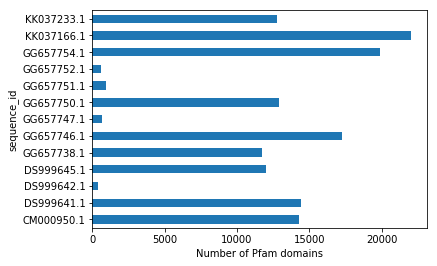

In [51]:
ax = domains.groupby('sequence_id').size().plot.barh()
ax.set_xlabel('Number of Pfam domains');

# evaluation/example.score.png

BGC detection scores of each Pfam domain in genomic order

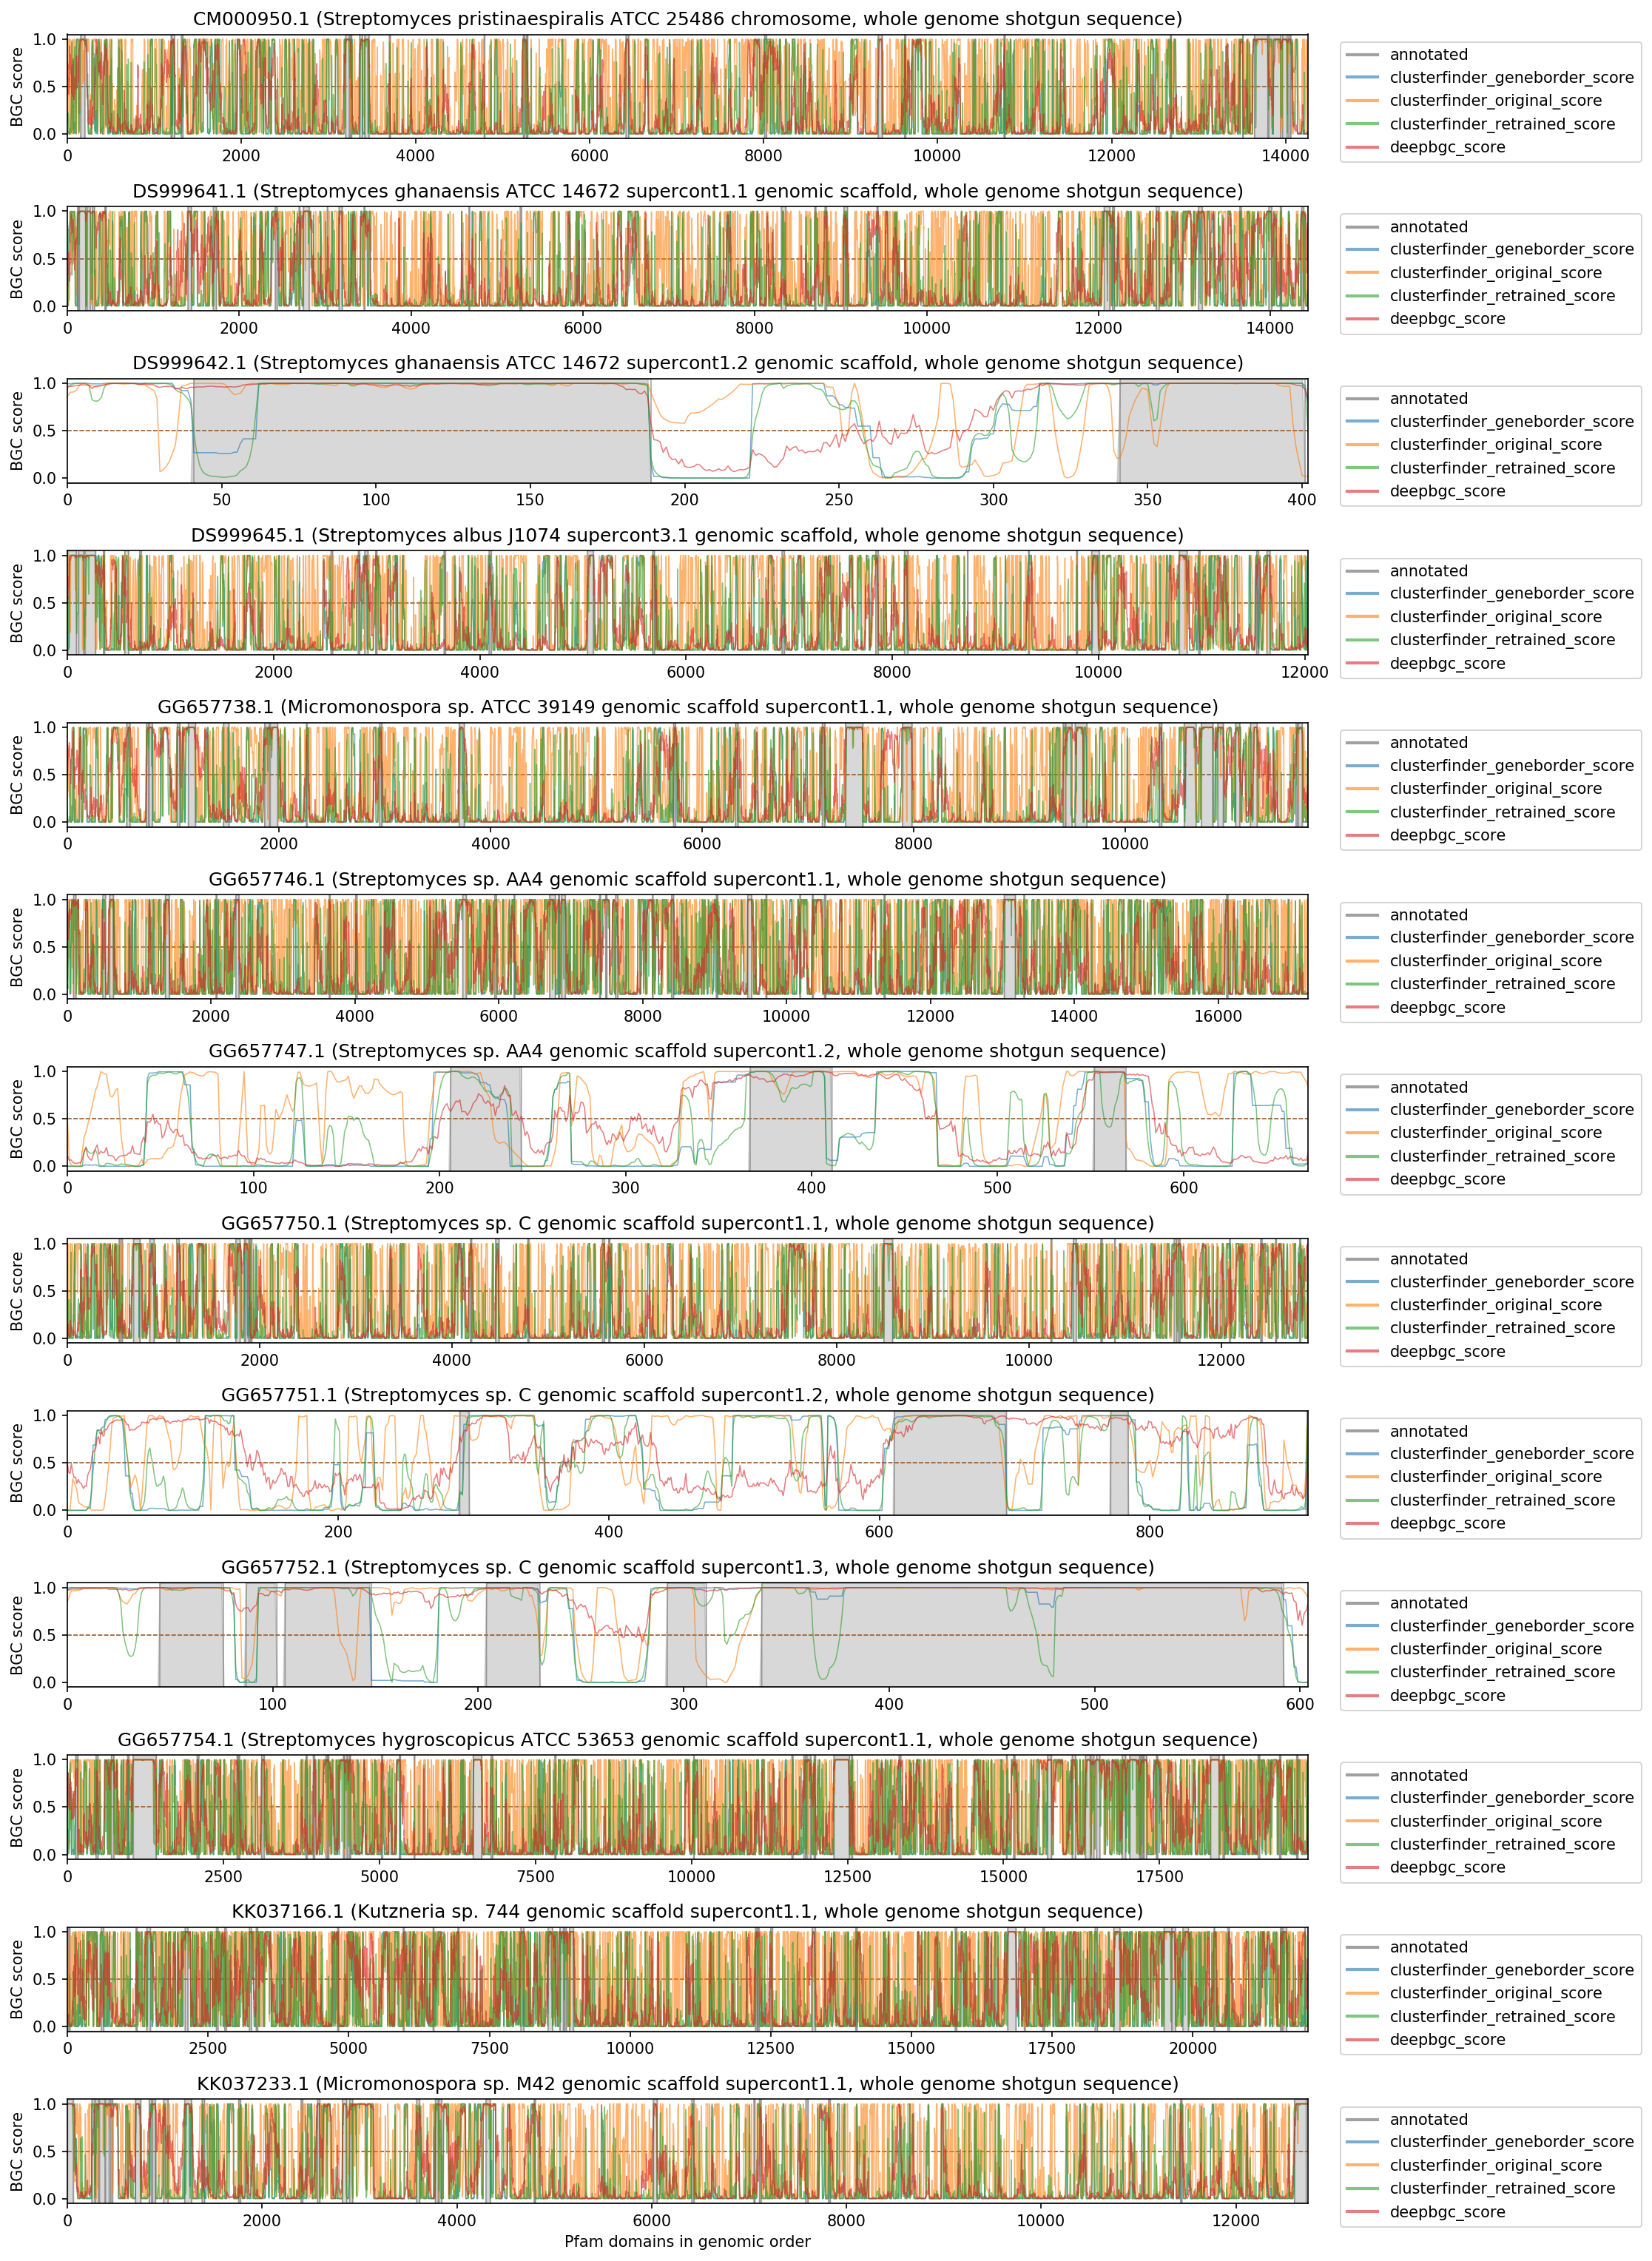

In [52]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME+'.score.png'))

# evaluation/example.bgc.png

Detected BGCs plotted by their nucleotide coordinates


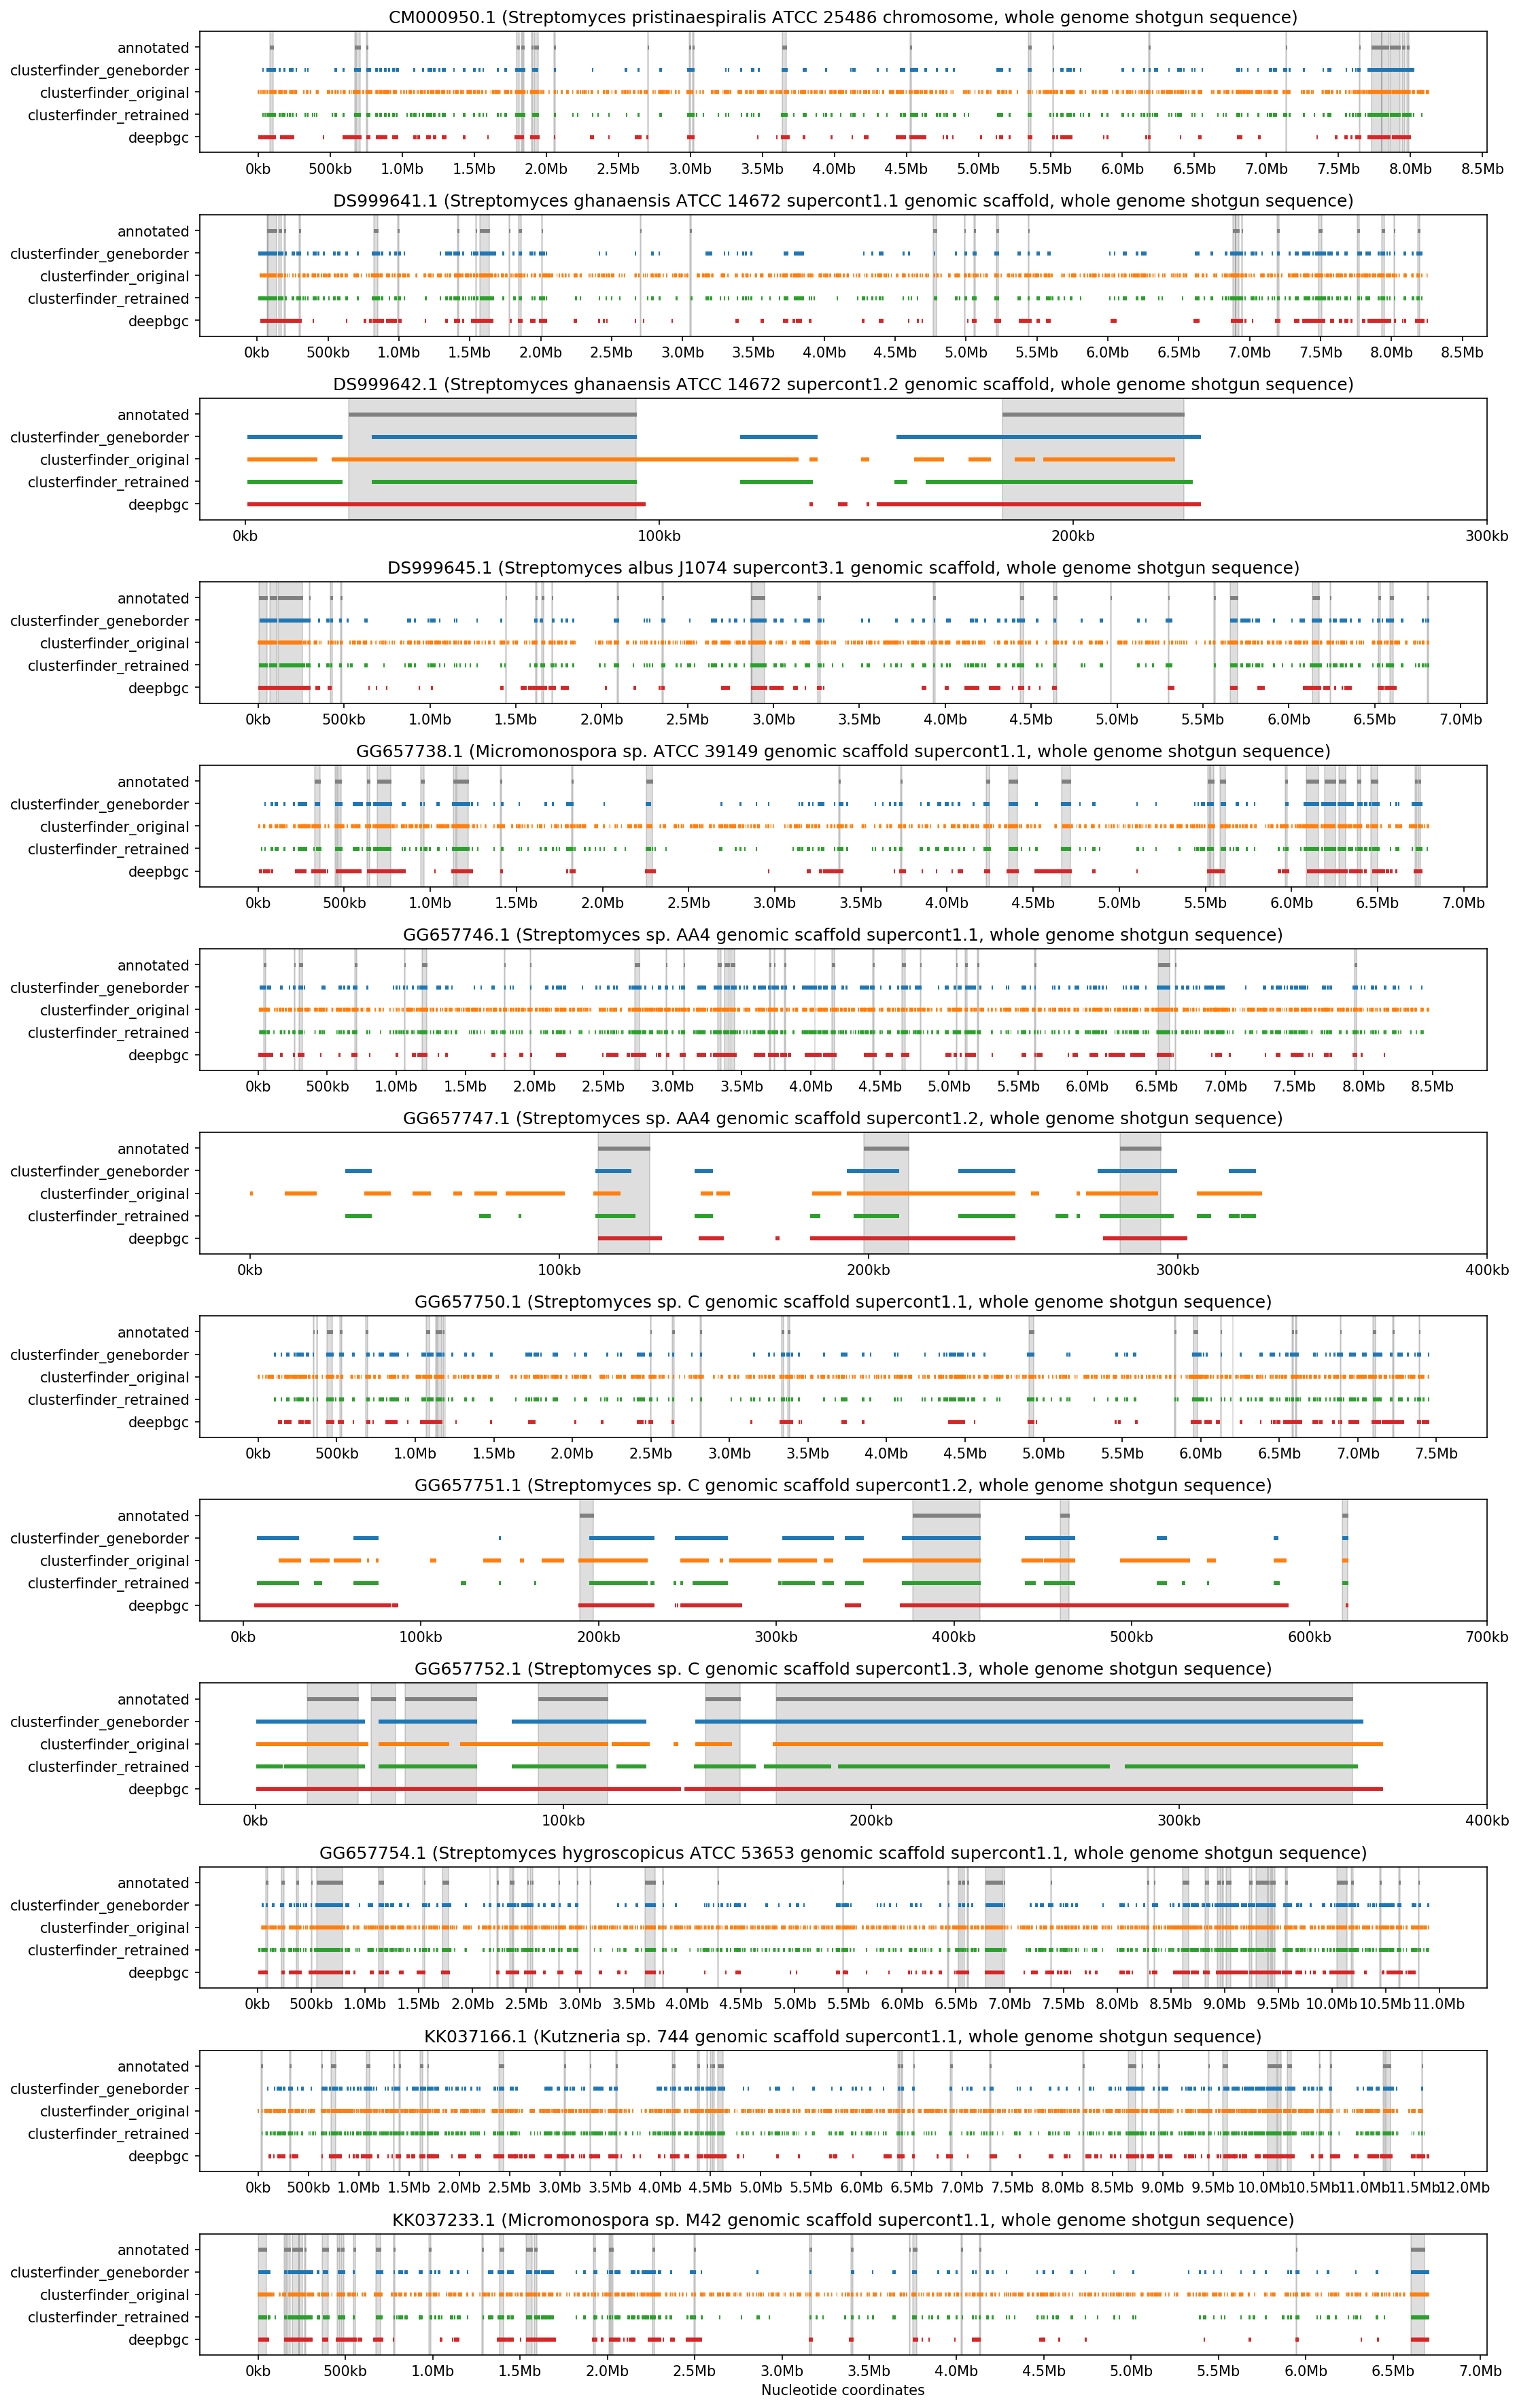

In [53]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME+'.bgc.png'))

# evaluation/example.roc.png

ROC curve based on predicted per-Pfam BGC scores


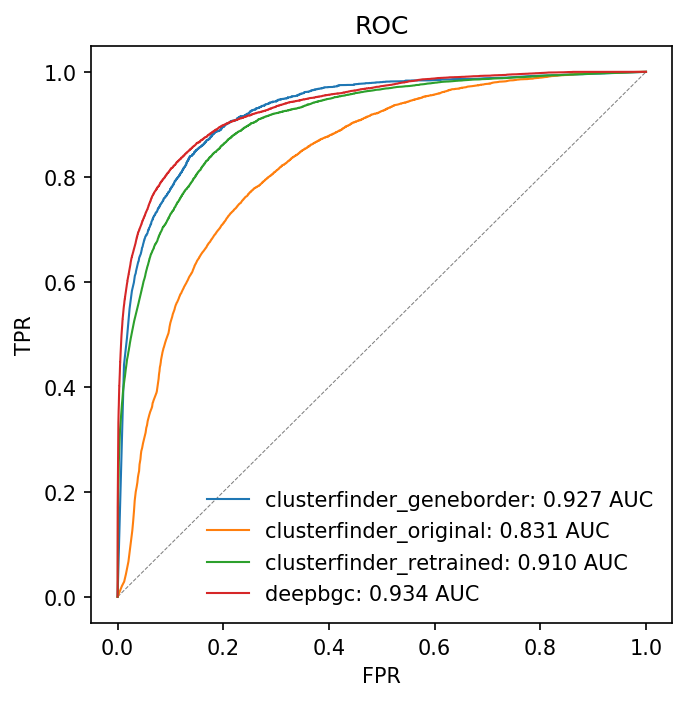

In [54]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME+'.roc.png'))

# evaluation/example.pr.png

Precision-Recall curve based on predicted per-Pfam BGC scores


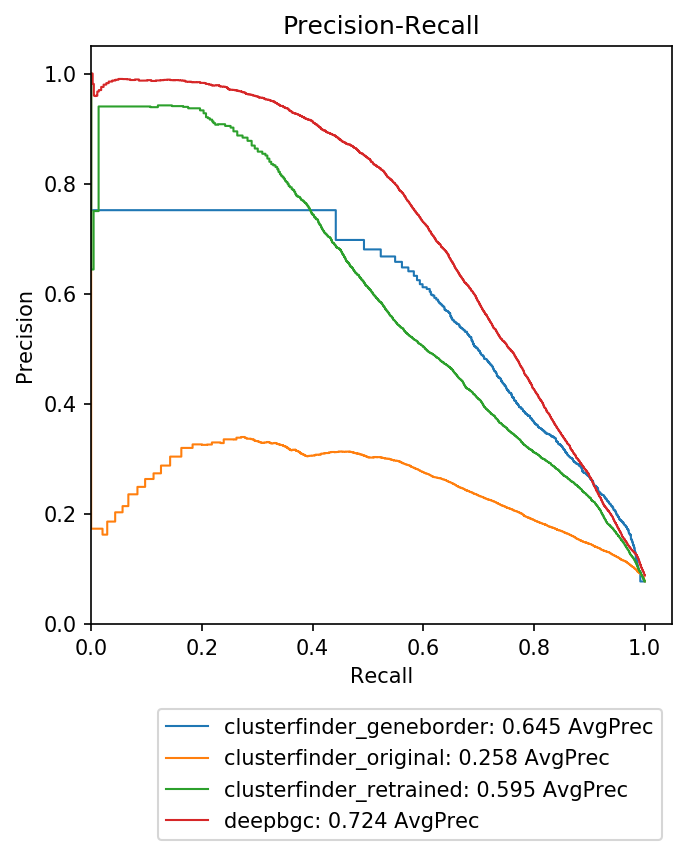

In [55]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME+'.pr.png'))